In [1]:
%run -i 'DStools.py'
import warnings 
warnings.simplefilter("error")
warnings.filterwarnings('ignore', category=PendingDeprecationWarning) 
warnings.filterwarnings('ignore', category=ResourceWarning) 

from PIL import Image


In [2]:
iris_df = pd.read_csv('Iris.csv', sep=',',na_values="NA", header=None, index_col=0)
iris_df.columns=['1','2','3','4','Cate']
iris_df['id']=iris_df.index
ppt(iris_df,lines=30,maxWidth = 12,minWidth=5,keepDecimal=2,lineWidth=190)

|      1|       2|       3|       4|          CATE|      ID|
|   5.10|    3.50|    1.40|    0.20|   Iris-setosa|       1|
|   4.90|    3.00|    1.40|    0.20|   Iris-setosa|       2|
|   4.70|    3.20|    1.30|    0.20|   Iris-setosa|       3|
|   4.60|    3.10|    1.50|    0.20|   Iris-setosa|       4|
|   5.00|    3.60|    1.40|    0.20|   Iris-setosa|       5|
|   5.40|    3.90|    1.70|    0.40|   Iris-setosa|       6|
|   4.60|    3.40|    1.40|    0.30|   Iris-setosa|       7|
|   5.00|    3.40|    1.50|    0.20|   Iris-setosa|       8|
|   4.40|    2.90|    1.40|    0.20|   Iris-setosa|       9|
|   4.90|    3.10|    1.50|    0.10|   Iris-setosa|      10|
|   5.40|    3.70|    1.50|    0.20|   Iris-setosa|      11|
|   4.80|    3.40|    1.60|    0.20|   Iris-setosa|      12|
|   4.80|    3.00|    1.40|    0.10|   Iris-setosa|      13|
|   4.30|    3.00|    1.10|    0.10|   Iris-setosa|      14|
|   5.80|    4.00|    1.20|    0.20|   Iris-setosa|      15|
|   5.70|    4.40|    1.

Select entries based on a combined condition shown in condition_dict

In [3]:
condition_dict={'Iris-setosa':0.4,'Iris-virginica':1.8}
combined_conditions_filter(condition_dict,iris_df,'Cate','4')

,1,2,3,4,Cate,id
0,,,,,,
6,5.4,3.9,1.7,0.4,Iris-setosa,6
16,5.7,4.4,1.5,0.4,Iris-setosa,16
17,5.4,3.9,1.3,0.4,Iris-setosa,17
22,5.1,3.7,1.5,0.4,Iris-setosa,22
27,5.0,3.4,1.6,0.4,Iris-setosa,27
32,5.4,3.4,1.5,0.4,Iris-setosa,32
45,5.1,3.8,1.9,0.4,Iris-setosa,45
104,6.3,2.9,5.6,1.8,Iris-virginica,104
108,7.3,2.9,6.3,1.8,Iris-virginica,108


Reorder feature based on correlationship. Highly correlated features are close to each other in the result.

In [4]:
generate_reordered_features(iris_df,['1','2','3','4'],[],True)

['2', '1', '3', '4']

1. Data frame is transformed into a matrix with selected columns and sorting by a certain column
2. The new matrix is scaled into a unit matrix, in which each row is summed into 1.

In [5]:
mx = dtm(iris_df,['1','2','3','4'],sort_column='Cate')
scaled_matrix = generate_unit_modules(mx, isrow=True, is_scale=True, simple_scale=True)
print(scaled_matrix[0].sum())

0.9999999999999999


1. Use decision tree to predict the label of iris data. The last printing is the overall accuracy and the standard deviation of accuracy
2. Use random forest to predict the label of iris data. The last printing is the overall accuracy and the standard deviation of accuracy

In [6]:
accuracy,full_wrong_list,full_test,full_predict,label_list = DT_RF_models(iris_df,['1','2','3','4'],'/home/ivan/data/temp/test/',isDT = True, iteration=5,testSize =0.1,readList = ['Cate','id'], label = 'Cate',DTdenotion='test',DT_maxdepth=2,numberOfTrees = 100,RF_maxdepth=6,isplot=False,id_column='id',handle_unbalance=True)
accuracy,full_wrong_list,full_test,full_predict,label_list = DT_RF_models(iris_df,['1','2','3','4'],'.temp/',isDT = False, iteration=5,testSize =0.1,readList = ['Cate','id'], label = 'Cate',DTdenotion='test',DT_maxdepth=2,numberOfTrees = 100,RF_maxdepth=6,isplot=False,id_column='id',handle_unbalance=True)


------------------accuracy = 0.9333333333333333------------------
------------------accuracy = 1.0------------------
------------------accuracy = 1.0------------------
------------------accuracy = 1.0------------------
------------------accuracy = 0.9333333333333333------------------
0.9733333333333334 0.03265986323710904
------------------accuracy = 1.0------------------
------------------accuracy = 1.0------------------
------------------accuracy = 1.0------------------
------------------accuracy = 1.0------------------
------------------accuracy = 1.0------------------
1.0 0.0


The feature importance analysis. The result shows the feature '3' has positive affinity with 'Iris-virginica' and negative affinity with 'Iris-versicolor'. The larger the ability, the more powerful for distinguishing samples from different categories is.

In [7]:
full_feature_importance_RF_DF = generate_RF_feature_importance('.temp/',iris_df,['1','2','3','4'],'Cate')
transform_feature_importance(full_feature_importance_RF_DF,label_list) 

,Features,Iris-setosa,Iris-versicolor,Iris-virginica,Sample Size,Ability
2,3,-0.041,-0.385,0.574,13989.0,29.033625
3,4,-0.058,-0.349,0.593,12411.0,26.843982
0,1,-0.215,0.130,0.656,4012.0,16.224901
1,2,0.131,0.362,-0.508,1324.0,16.092879


Plot the ROC plot

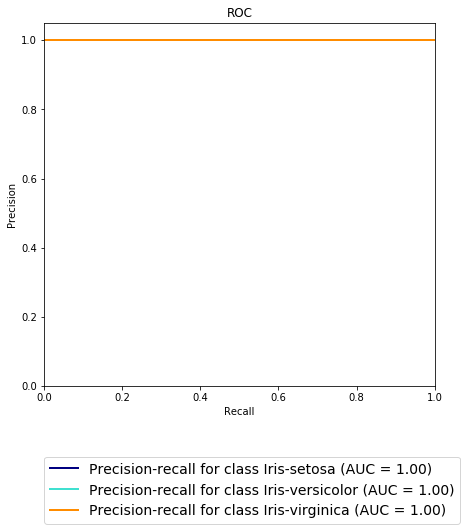

In [8]:

plot_precision_recall_curve(full_test,full_predict,label_list,class_num=3,title='ROC') 


Print the recall and precision for each category

In [9]:
print_precision_recall_accuracy(full_test,full_predict,label_list,class_num=3)

Overall Accuray:  1.0
Iris-setosa label size: 25
Iris-setosa Recall:  1.0
Iris-setosa Precision:  1.0
Iris-versicolor label size: 25
Iris-versicolor Recall:  1.0
Iris-versicolor Precision:  1.0
Iris-virginica label size: 25
Iris-virginica Recall:  1.0
Iris-virginica Precision:  1.0


Print the details of incorrect predictions

In [10]:
print_full_wrong_list(full_wrong_list)

Use combined xgboost models to make predictions and show the output.

In [11]:
training_X,testing_X,training_Y,testing_Y = cross_validation_split_with_unbalance_data(iris_df,['1','2','3','4'],label='Cate',id_column='id',test_size=0.2,handle_unbalance=True)
training_X['Cate']=training_Y
testing_X['Cate']=testing_Y
df_result = combined_eXGBT_classifier(training_set = training_X,numeric_features_validation = ['1','2','3','4'],testing_set = testing_X,label_column = 'Cate',max_depth=2,num_class=3,num_trees=50)
full_result,clean_result = transform_predict_result_DF(predict_result_DF =df_result, label_col='Cate', threshold=0.1)
full_result

,1,2,3,4,Cate,Iris-virginica,Iris-setosa,Iris-versicolor,multi_eXGBT_pre_lable,predict_result_DF_indices,probability,F_label
25,4.8,3.4,1.9,0.2,Iris-setosa,0.045455,0.647059,0.055556,Iris-setosa,25,0.647059,Iris-setosa
44,5.0,3.5,1.6,0.6,Iris-setosa,0.045455,0.647059,0.055556,Iris-setosa,44,0.647059,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa,0.045455,0.647059,0.055556,Iris-setosa,10,0.647059,Iris-setosa
39,4.4,3.0,1.3,0.2,Iris-setosa,0.045455,0.647059,0.055556,Iris-setosa,39,0.647059,Iris-setosa
43,4.4,3.2,1.3,0.2,Iris-setosa,0.045455,0.647059,0.055556,Iris-setosa,43,0.647059,Iris-setosa
26,5.0,3.0,1.6,0.2,Iris-setosa,0.045455,0.647059,0.055556,Iris-setosa,26,0.647059,Iris-setosa
49,5.3,3.7,1.5,0.2,Iris-setosa,0.045455,0.647059,0.083333,Iris-setosa,49,0.647059,Iris-setosa
1,5.1,3.5,1.4,0.2,Iris-setosa,0.045455,0.647059,0.055556,Iris-setosa,1,0.647059,Iris-setosa
12,4.8,3.4,1.6,0.2,Iris-setosa,0.045455,0.647059,0.055556,Iris-setosa,12,0.647059,Iris-setosa
20,5.1,3.8,1.5,0.3,Iris-setosa,0.045455,0.647059,0.055556,Iris-setosa,20,0.647059,Iris-setosa


Plot heatmap for each cluster of K-means by Bokeh

In [12]:
plot_heatmap_for_kmeans_groups(data_frame=iris_df,numeric_features=['1','2','3','4'],path='.temp', clusters=3, is_row=True)

The plots generated by boken are html files. In order to show the plots, I transformed them into png file and showed in jupyter notebook

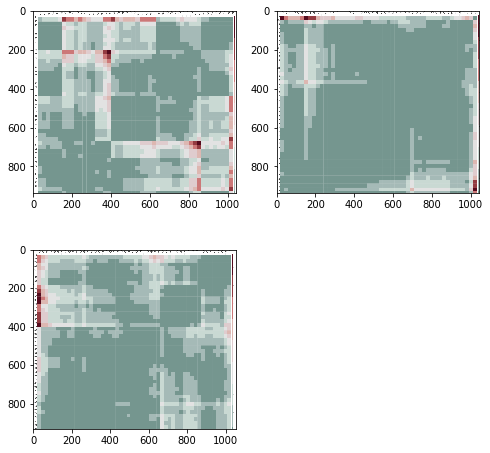

In [13]:
fig=plt.figure(figsize=(8, 8))
img1 = Image.open('materials/cluster1.png')
fig.add_subplot(2, 2, 1)
plt.imshow(img1)
img2 = Image.open('materials/cluster2.png')
fig.add_subplot(2, 2, 2)
plt.imshow(img2)
img3 = Image.open('materials/cluster3.png')
fig.add_subplot(2, 2, 3)
plt.imshow(img3)

tSNE plot with bokeh embedded.

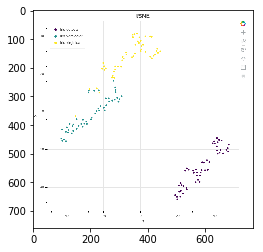

In [14]:
tsne_df = tSNEPlot(iris_df,['1','2','3','4'],['Cate','id'],'Cate','.temp/tsn.html',size_col = 5, iters=2000, perp=8, title='tSNE',num_components=2)
img1 = Image.open('materials/tsne.png')
plt.imshow(img1)

A novel visualisation method used for dataset with 100 to 1000 features. 4 examples are shown below:

Notice:

1.The dataset megadata_validation is which I used in my research project, I cannot provide this data due to confidentiality agreement.

2.Please use another dataset and rewrite the function of generate_levels_reordered_megadata_DF to run this example.

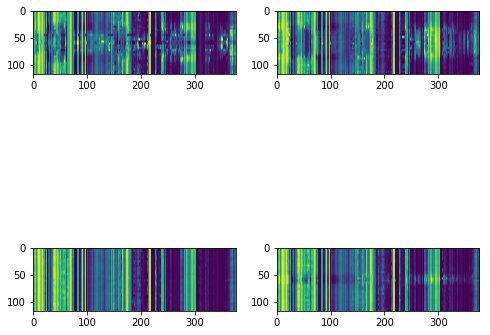

In [15]:
plot_colorful_images_wrapper(megadata_validation, megadata_validation, megadata_validation, numeric_features_validation, 'sepcom', 2, 0, '.temp', simple_scale=True, generate_reordered_indices=generate_levels_reordered_megadata_DF)
fig=plt.figure(figsize=(8, 8))
img1 = Image.open('.temp/layer1_1Mitomycin C.png')
fig.add_subplot(2, 2, 1)
plt.imshow(img1)
img2 = Image.open('.temp/layer1_86Cytarabine.png')
fig.add_subplot(2, 2, 2)
plt.imshow(img2)
img3 = Image.open('.temp/layer1_440Sucrose.png')
fig.add_subplot(2, 2, 3)
plt.imshow(img3)
img4 = Image.open('.temp/layer1_447Temozolomide.png')
fig.add_subplot(2, 2, 4)
plt.imshow(img4)